The Final Project - The Comparison of NASDAQ Top three stocks ( nvidia, Apple, Microsoft)
-
Members : Youness Omary, Adrian Golamini, Amine Oudebji,MOHAMED BEN LECHEHAB,Ange-Destin Elenga,Sahar Jaziri,Mahmoud Berrada
-

In [ ]:
pip install finance

In [ ]:
#import all relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#import all data
import datetime
import pandas_datareader.data as web
import yfinance as yf

#for the T test
from scipy import stats

#logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics


In [ ]:
nvidia=yf.Ticker("NVDA")
nvidia_data=nvidia.history(start="2025-07-01",end="2025-10-01")
print(nvidia_data.head())

                                 Open        High         Low       Close  \
Date                                                                        
2025-07-01 00:00:00-04:00  156.281188  157.191141  151.481471  153.291367   
2025-07-02 00:00:00-04:00  152.971371  157.591121  152.961377  157.241135   
2025-07-03 00:00:00-04:00  158.361062  160.970916  157.761105  159.331009   
2025-07-07 00:00:00-04:00  158.191073  159.301011  157.331121  158.231079   
2025-07-08 00:00:00-04:00  159.321022  160.210971  158.381072  159.990982   

                              Volume  Dividends  Stock Splits  
Date                                                           
2025-07-01 00:00:00-04:00  213143600        0.0           0.0  
2025-07-02 00:00:00-04:00  171224100        0.0           0.0  
2025-07-03 00:00:00-04:00  143716100        0.0           0.0  
2025-07-07 00:00:00-04:00  140139000        0.0           0.0  
2025-07-08 00:00:00-04:00  138133000        0.0           0.0  


In [ ]:
nvidia_data['Close'].shift(1).head()
nvidia_data['returns'] = nvidia_data['Close'].pct_change(1)
nvidia_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits,returns
Date,,,,,,,,
2025-07-01 00:00:00-04:00,156.281188,157.191141,151.481471,153.291367,213143600,0.0,0.0,NaN
2025-07-02 00:00:00-04:00,152.971371,157.591121,152.961377,157.241135,171224100,0.0,0.0,0.025766
2025-07-03 00:00:00-04:00,158.361062,160.970916,157.761105,159.331009,143716100,0.0,0.0,0.013291
2025-07-07 00:00:00-04:00,158.191073,159.301011,157.331121,158.231079,140139000,0.0,0.0,-0.006903
2025-07-08 00:00:00-04:00,159.321022,160.210971,158.381072,159.990982,138133000,0.0,0.0,0.011122
...,...,...,...,...,...,...,...,...
2025-09-24 00:00:00-04:00,179.770004,179.779999,175.399994,176.970001,143564100,0.0,0.0,-0.008182
2025-09-25 00:00:00-04:00,174.479996,180.259995,173.130005,177.690002,191586700,0.0,0.0,0.004068
2025-09-26 00:00:00-04:00,178.169998,179.770004,174.929993,178.190002,148573700,0.0,0.0,0.002814


In [ ]:
parameters_nvd = pd.DataFrame({'Mean': [nvidia_data['returns'].mean()],'Std_Dev': [nvidia_data['returns'].std()]})
parameters_nvd

,Mean,Std_Dev
0,0.003274,0.01746


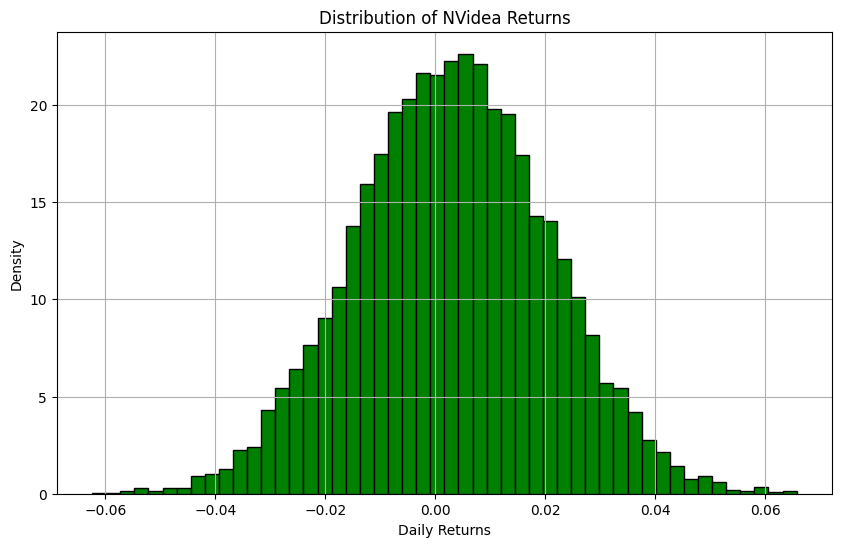

In [ ]:
# Extract mean and standard deviation from parameters_nvd
mean_nvd = parameters_nvd['Mean'].iloc[0]
std_dev_nvd = parameters_nvd['Std_Dev'].iloc[0]

# Generate a normal distribution
# We'll generate 10000 data points for better visualization
simulated_returns_nvd = np.random.normal(mean_nvd, std_dev_nvd, 10000)

# Plot the simulated distribution
plt.figure(figsize=(10, 6))
plt.hist(simulated_returns_nvd, bins=50, color='green', edgecolor='black', density=True)
plt.title('Distribution of NVidea Returns')
plt.xlabel('Daily Returns')
plt.ylabel('Density')
plt.grid(True)
plt.show()

In [ ]:
microsoft=yf.Ticker("MSFT")
microsoft_data=microsoft.history(start="2025-07-01",end="2025-10-01")
print(microsoft_data.head())

                                 Open        High         Low       Close  \
Date                                                                        
2025-07-01 00:00:00-04:00  495.655191  497.232584  490.174211  491.242432   
2025-07-02 00:00:00-04:00  489.185826  492.690076  487.897965  490.284027   
2025-07-03 00:00:00-04:00  492.999558  499.309193  492.630170  498.021301   
2025-07-07 00:00:00-04:00  496.563699  497.931446  494.417234  496.903137   
2025-07-08 00:00:00-04:00  496.423909  497.382356  493.299041  495.804932   

                             Volume  Dividends  Stock Splits  
Date                                                          
2025-07-01 00:00:00-04:00  19945400        0.0           0.0  
2025-07-02 00:00:00-04:00  16319600        0.0           0.0  
2025-07-03 00:00:00-04:00  13984800        0.0           0.0  
2025-07-07 00:00:00-04:00  13981600        0.0           0.0  
2025-07-08 00:00:00-04:00  11846600        0.0           0.0  


In [ ]:
#The daily return for microsoft and mean/std dev
microsoft_data['returns'] = (microsoft_data['Close'] / microsoft_data['Close'].shift(1) ) - 1
display(microsoft_data.head())

,Open,High,Low,Close,Volume,Dividends,Stock Splits,returns
Date,,,,,,,,
2025-07-01 00:00:00-04:00,495.655191,497.232584,490.174211,491.242432,19945400,0.0,0.0,NaN
2025-07-02 00:00:00-04:00,489.185826,492.690076,487.897965,490.284027,16319600,0.0,0.0,-0.001951
2025-07-03 00:00:00-04:00,492.999558,499.309193,492.630170,498.021301,13984800,0.0,0.0,0.015781
2025-07-07 00:00:00-04:00,496.563699,497.931446,494.417234,496.903137,13981600,0.0,0.0,-0.002245
2025-07-08 00:00:00-04:00,496.423909,497.382356,493.299041,495.804932,11846600,0.0,0.0,-0.002210


In [ ]:
parameters_msft = pd.DataFrame({'Mean': [microsoft_data['returns'].mean()],'Std_Dev': [microsoft_data['returns'].std()]})
parameters_msft

,Mean,Std_Dev
0,0.000893,0.010312


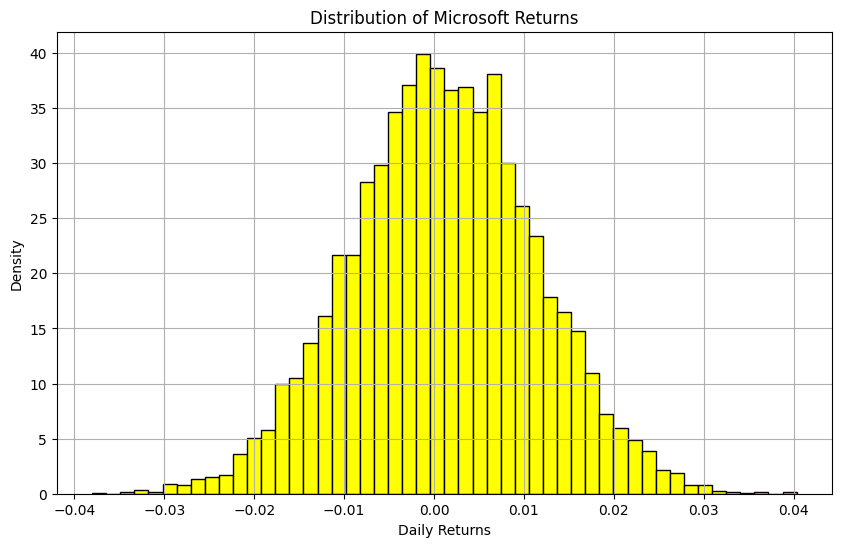

In [ ]:
# Extract mean and standard deviation from parameters_msft
mean_msft = parameters_msft['Mean'].iloc[0]
std_dev_msft = parameters_msft['Std_Dev'].iloc[0]

# Generate a normal distribution
# We'll generate 10000 data points for better visualization
simulated_returns_msft = np.random.normal(mean_msft, std_dev_msft, 10000)

# Plot the simulated normal distribution
plt.figure(figsize=(10, 6))
plt.hist(simulated_returns_msft, bins=50, color='yellow', edgecolor='black', density=True)
plt.title('Distribution of Microsoft Returns')
plt.xlabel('Daily Returns')
plt.ylabel('Density')
plt.grid(True)
plt.show()

In [ ]:
#The daily return for apple
apple= yf.Ticker("AAPL")
apple_data=apple.history(start="2025-07-01",end="2025-10-01")
print(apple_data.head())

                                 Open        High         Low       Close  \
Date                                                                        
2025-07-01 00:00:00-04:00  206.435706  209.951720  205.906308  207.584412   
2025-07-02 00:00:00-04:00  208.673176  213.098147  207.904045  212.199173   
2025-07-03 00:00:00-04:00  211.909500  214.406666  211.569889  213.307922   
2025-07-07 00:00:00-04:00  212.438891  215.984870  208.563300  209.711990   
2025-07-08 00:00:00-04:00  209.861836  211.190315  208.213698  209.771927   

                             Volume  Dividends  Stock Splits  
Date                                                          
2025-07-01 00:00:00-04:00  78788900        0.0           0.0  
2025-07-02 00:00:00-04:00  67941800        0.0           0.0  
2025-07-03 00:00:00-04:00  34955800        0.0           0.0  
2025-07-07 00:00:00-04:00  50229000        0.0           0.0  
2025-07-08 00:00:00-04:00  42848900        0.0           0.0  


In [ ]:
#The daily return for apple
apple_data['returns'] = (apple_data['Close'] / apple_data['Close'].shift(1) ) - 1
display(apple_data.head())

,Open,High,Low,Close,Volume,Dividends,Stock Splits,returns
Date,,,,,,,,
2025-07-01 00:00:00-04:00,206.435706,209.951720,205.906308,207.584412,78788900,0.0,0.0,NaN
2025-07-02 00:00:00-04:00,208.673176,213.098147,207.904045,212.199173,67941800,0.0,0.0,0.022231
2025-07-03 00:00:00-04:00,211.909500,214.406666,211.569889,213.307922,34955800,0.0,0.0,0.005225
2025-07-07 00:00:00-04:00,212.438891,215.984870,208.563300,209.711990,50229000,0.0,0.0,-0.016858
2025-07-08 00:00:00-04:00,209.861836,211.190315,208.213698,209.771927,42848900,0.0,0.0,0.000286


In [ ]:
parameters_apple = pd.DataFrame({'Mean': [apple_data['returns'].mean()],'Std_Dev': [apple_data['returns'].std()]})
parameters_apple

,Mean,Std_Dev
0,0.003367,0.015635


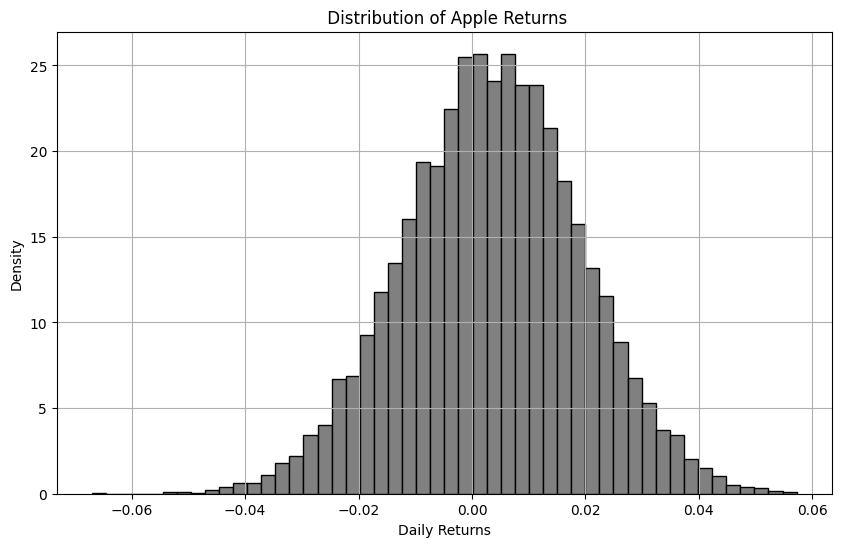

In [ ]:

# Extract mean and standard deviation from parameters_apple
mean_apple = parameters_apple['Mean'].iloc[0]
std_dev_apple = parameters_apple['Std_Dev'].iloc[0]

# Generate a normal distribution
# We'll generate 10000 data points for better visualization
simulated_returns_apple = np.random.normal(mean_apple, std_dev_apple, 10000)

# Plot the simulated normal distribution
plt.figure(figsize=(10, 6))
plt.hist(simulated_returns_apple, bins=50, color='gray', edgecolor='black', density=True)
plt.title(' Distribution of Apple Returns')
plt.xlabel('Daily Returns')
plt.ylabel('Density')
plt.grid(True)
plt.show()

Text(0, 0.5, 'Frequency')

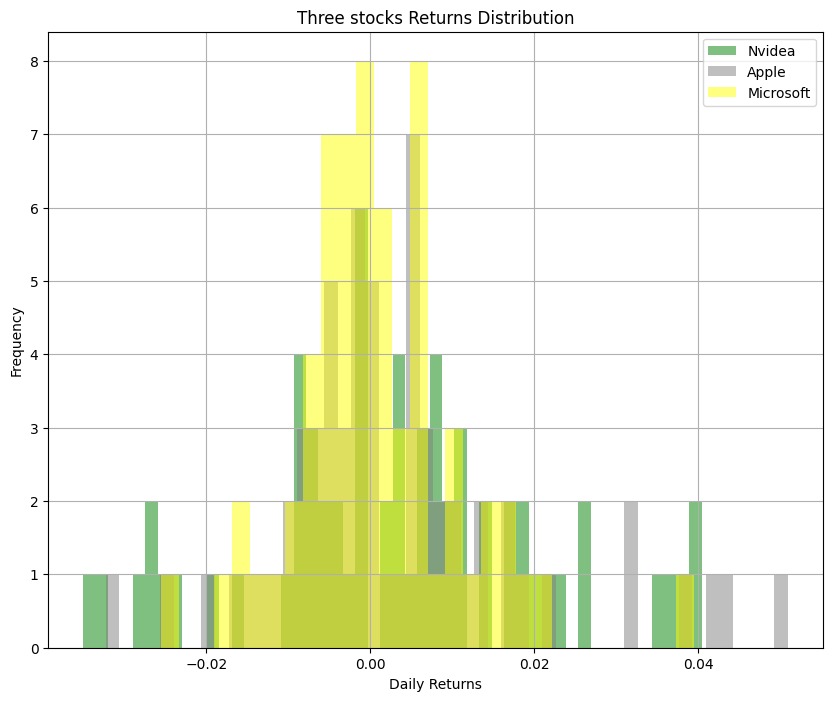

In [ ]:
nvidia_data['returns'].hist(bins=50, label='Nvidea',color ="green", figsize=(10,8), alpha=0.5)
apple_data['returns'].hist(bins=50, label='Apple', color="gray",alpha=0.5)
microsoft_data['returns'].hist(bins=30, label='Microsoft',color="yellow", alpha=0.5)
plt.title('Three stocks Returns Distribution')
plt.legend();
plt.xlabel('Daily Returns')
plt.ylabel('Frequency')

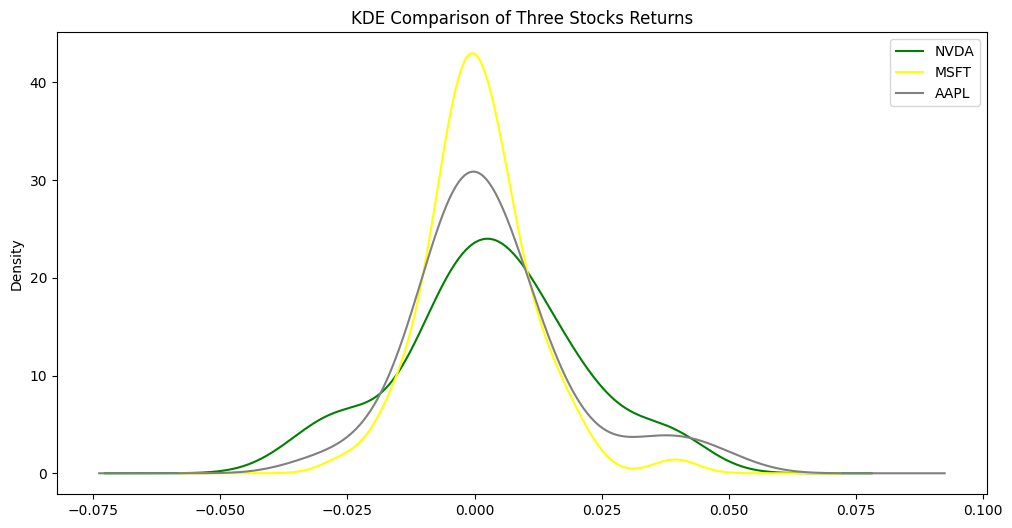

In [ ]:
nvidia_data['returns'].plot(kind='kde',label='NVDA',figsize=(12,6),color="green")
microsoft_data['returns'].plot(kind='kde',label='MSFT',color="yellow")
apple_data['returns'].plot(kind='kde',label='AAPL',color="gray")
plt.title('KDE Comparison of Three Stocks Returns')
plt.legend()

As we Know the mean of each Stock ("NVDA,MSFT,AAPL") are positive (mean>0) therefore the average return tends to go up.
-
Nvidia's mean = 0.004631
-
Which states that on average, Nvidia’s price increases by 0.46% per day with a standard deviation= 0.020276 which reflects the Risk therefore the stock fluctuates by 2.0276% either up or down from the average return.

Microsoft's mean=0.001305
-
Which states that on average, Microsoft’s price increases by 0.13% per day with a standard deviation= 0.010234 which reflects the Risk therefore the stock fluctuates by 1.0234% either up or down from the average return.

Apple's mean=0.005317
-
Which states that on average, Apple’s price increases by 0.53% per day with a standard deviation= 0.018226 which reflects the Risk therefore the stock fluctuates by 1.8226 either up or down from the average return.

In [ ]:

# H0: The mean daily returns of the two stocks are equal
# H1: The mean daily returns of the two stocks are different

# Combine all returns into one DataFrame
returns_df = pd.concat([nvidia_data['returns'].rename('NVDA'),microsoft_data['returns'].rename('MSFT'),apple_data['returns'].rename('AAPL')], axis=1).dropna()

# comparing pairs
pairs = [('NVDA', 'MSFT'), ('NVDA', 'AAPL'), ('MSFT', 'AAPL')]

# Welch T-tests
print(" Independent (Welch) T-tests ")
for a, b in pairs:
    t_stat, p_val = stats.ttest_ind(returns_df[a], returns_df[b], equal_var=False)
    print(f"{a} vs {b}: t = {t_stat:.3f}, p = {p_val:.4f}")
    if p_val < 0.05:
        print(" Significant difference in mean returns (reject H₀)\n ")
    elif p_val >= 0.05:
        print(" No significant difference (Do not reject H₀)\n ")

# Dependent Paired T-tests
print(" Dependent (Paired) T-tests ")
for a, b in pairs:
    t_stat, p_val = stats.ttest_rel(returns_df[a], returns_df[b])
    print(f"{a} vs {b}: t = {t_stat:.3f}, p = {p_val:.4f}")
    if p_val < 0.05:
        print(" Significant difference in mean returns (reject H₀)\n ")
    elif p_val >= 0.05:
        print(" No significant difference (Do not reject H₀)\n ")


summary_data = []
for a, b in pairs:
    t_welch, p_welch = stats.ttest_ind(returns_df[a], returns_df[b], equal_var=False)
    t_paired, p_paired = stats.ttest_rel(returns_df[a], returns_df[b])
    summary_data.append({'Pair': f'{a} vs {b}','Welch t-stat': round(t_welch, 3),'Welch p-value': round(p_welch, 4),'Paired t-stat': round(t_paired, 3),'Paired p-value': round(p_paired, 4)})

summary_df = pd.DataFrame(summary_data)
display(summary_df)

 Independent (Welch) T-tests 
NVDA vs MSFT: t = 0.549, p = 0.5843
 No significant difference (Do not reject H₀)
 
NVDA vs AAPL: t = -0.537, p = 0.5922
 No significant difference (Do not reject H₀)
 
MSFT vs AAPL: t = -1.257, p = 0.2119
 No significant difference (Do not reject H₀)
 
 Dependent (Paired) T-tests 
NVDA vs MSFT: t = 0.669, p = 0.5067
 No significant difference (Do not reject H₀)
 
NVDA vs AAPL: t = -0.574, p = 0.5686
 No significant difference (Do not reject H₀)
 
MSFT vs AAPL: t = -1.297, p = 0.2005
 No significant difference (Do not reject H₀)
 


,Pair,Welch t-stat,Welch p-value,Paired t-stat,Paired p-value
0,NVDA vs MSFT,0.549,0.5843,0.669,0.5067
1,NVDA vs AAPL,-0.537,0.5922,-0.574,0.5686
2,MSFT vs AAPL,-1.257,0.2119,-1.297,0.2005


To evaluate wehter the selected NASDAQ stocks differ in average daily returns, we performed independant (welch) and depandent (paired) t-tests on return seris of Nvidia, Microsoft and Apple

The Welch t-test compares the mean daily return of thwo stocks while allowing unequal variances. this makes sense for financial data because stocks have diferent level of volatility

Dependant t-test compares the same two stocks day by day. Each trading day acts as a paired observation and we test wheter the average difference between two return series is zero.

<Axes: >

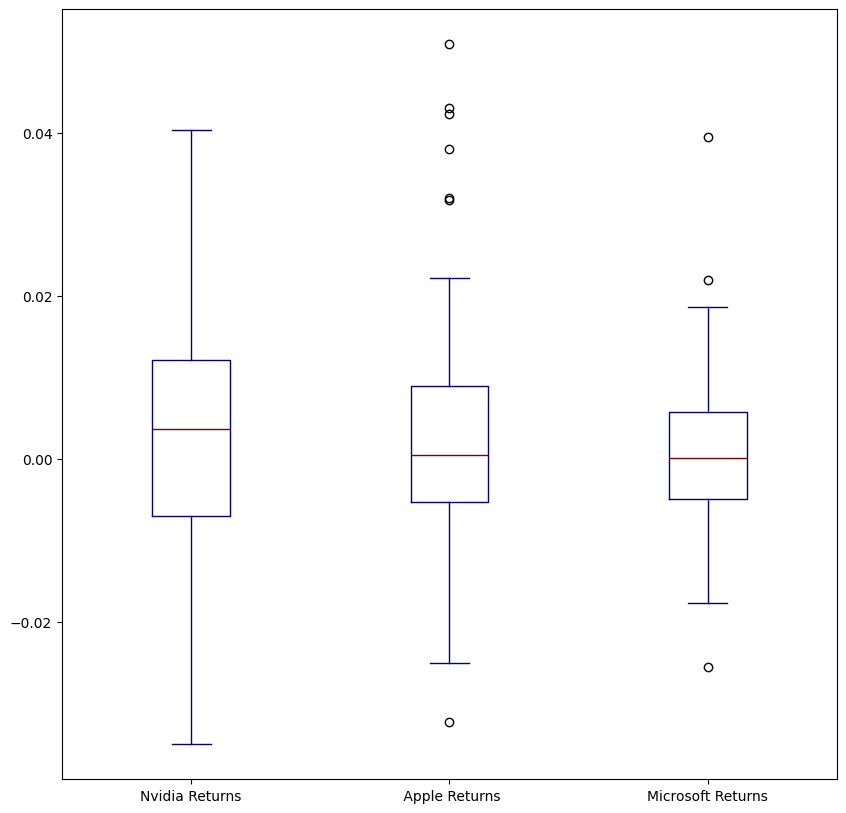

In [ ]:
box_df = pd.concat([nvidia_data['returns'],apple_data['returns'],microsoft_data['returns']],axis=1)
box_df.columns = ['Nvidia Returns',' Apple Returns','Microsoft Returns']
box_df.plot(kind='box',figsize=(10,10),colormap='jet')


In [ ]:
mean_msft = parameters_msft['Mean'].iloc[0]
std_dev_msft = parameters_msft['Std_Dev'].iloc[0]

# Define the threshold (e.g., 2 standard deviations from the mean)
threshold = 2
threshold2 = 1.5

# Identify outliers (either very high or very low returns)
outliers_micr = microsoft_data[(microsoft_data['returns'] > mean_msft + threshold * std_dev_msft) |(microsoft_data['returns'] < mean_msft - threshold * std_dev_msft)]
outliers_apple = apple_data[(apple_data['returns'] > mean_apple + threshold2 * std_dev_apple) |(apple_data['returns'] < mean_apple - threshold * std_dev_apple)]
# Display them
print(f"The Data of the returns on Microsoft {outliers_micr[['returns']]}")
print("")
print(f"The Data of the returns on Apple {outliers_apple[['returns']]}")

The Data of the returns on Microsoft                             returns
Date                               
2025-07-31 00:00:00-04:00  0.039475
2025-08-04 00:00:00-04:00  0.021999
2025-09-05 00:00:00-04:00 -0.025533

The Data of the returns on Apple                             returns
Date                               
2025-08-06 00:00:00-04:00  0.050907
2025-08-07 00:00:00-04:00  0.031794
2025-08-08 00:00:00-04:00  0.042358
2025-09-03 00:00:00-04:00  0.038090
2025-09-10 00:00:00-04:00 -0.032259
2025-09-19 00:00:00-04:00  0.032033
2025-09-22 00:00:00-04:00  0.043096


| Date                    | Return you flagged       | Possible cause(s)                                                                                                                                                                                     | Why that cause applies                                                                                                                                     |
| ----------------------- | ------------------------ | ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- | ---------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **2025-08-06** (+5.09%) | Very large positive move | • Big corporate news (e.g., AAPL plan to invest $100 billion in U.S. manufacturing) <br>• Strong earnings season and optimism for rate cuts                             | On that date the indices gained and the article noted Apple shares jumped after the manufacturing pledge, which could drive outlier return.|
| **2025-08-07** (+3.18%) | Large positive move      | Follow-through from the same wave of optimism (earnings + macro)                                                                                                                                      | A strong move on 8/6 may have carried into 8/7 due to momentum.                                                                                            |
| **2025-08-08** (+4.24%) | Large positive move      | Possibly continued effect of corporate news and market momentum                                                                                                                                       | While I didn’t find specific new news for 8/8, markets often see clusters of strong performance driven by broad market factors and sector-specific tailwinds. |
| **2025-09-03** (+3.81%) | Large positive move      |  Continued positive momentum or specific sector news (AI developments benefiting tech stocks)                                                                                                      |  The tech sector, including Apple, was likely still benefiting from ongoing positive trends.                                                              |
| **2025-09-10** (-3.23%) | Large negative move      | • Broad market downturn (interest rate concerns) • Sector-specific news (Regulatory concerns for tech) • Analyst downgrades                                                                 | This date falls within a period where tech stocks, including Apple, experienced some volatility, possibly linked to broader economic sentiment.             |
| **2025-09-19** (+3.20%) | Large positive move      | Positive market sentiment returns, or company-specific positive news (Product announcement anticipation)                                                                                      | Market rebounds or anticipation of Apple events could explain this.                                                                                      |
| **2025-09-22** (+4.31%) | Very large positive move | Strong market close to the quarter, positive analyst commentary, or anticipation of key events/earnings.                                                                                             | End-of-quarter pushes are common, and positive analyst outlooks can significantly impact stock price.                                                    |

The 2025-09-05 Outlier of MSFT is due to CEO Satya Nadella sold shares (pre-arranged plan) — Large insider sales were widely reported and flagged by the market.Volume spiked that day — MSFT traded roughly ~32.0M shares on Sept 5 (well above nearby daily volumes and above several-week averages), indicating heavier selling/flow than a “light” pullback.


In [ ]:
clean_data=nvidia_data.dropna()
nvidia_data.isnull().sum()

,0
Open,0
High,0
Low,0
Close,0
Volume,0
Dividends,0
Stock Splits,0
returns,1


In [ ]:
nvidia_data.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits',
       'returns'],
      dtype='object')

In [ ]:
# by giving the next day return to the previous one we can know if it is positive or negative
nvidia_data['Profitability_nextday'] = (nvidia_data['returns'].shift(-1) > 0).astype(int)
nvidia_data['Target_today'] = (nvidia_data['returns'].shift(0) > 0).astype(int)

nvidia_data = nvidia_data.dropna().reset_index(drop=True)
nvidia_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,returns,Profitability_nextday,Target_today
0,152.971371,157.591121,152.961377,157.241135,171224100,0.0,0.0,0.025766,1,1
1,158.361062,160.970916,157.761105,159.331009,143716100,0.0,0.0,0.013291,0,1
2,158.191073,159.301011,157.331121,158.231079,140139000,0.0,0.0,-0.006903,1,0
3,159.321022,160.210971,158.381072,159.990982,138133000,0.0,0.0,0.011122,1,1
4,161.210909,164.410726,161.150915,162.870819,183656400,0.0,0.0,0.018000,1,1


In [ ]:
for i in range(1, 6):  # 5 days lag
    nvidia_data[f'Lag{i}'] = nvidia_data['returns'].shift(i)

nvidia_data = nvidia_data.dropna().reset_index(drop=True)

In [ ]:
X = nvidia_data[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5',]]
y = nvidia_data['Profitability_nextday']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,shuffle=False,)

In [ ]:
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)

<Axes: xlabel='Predicted', ylabel='Actual'>

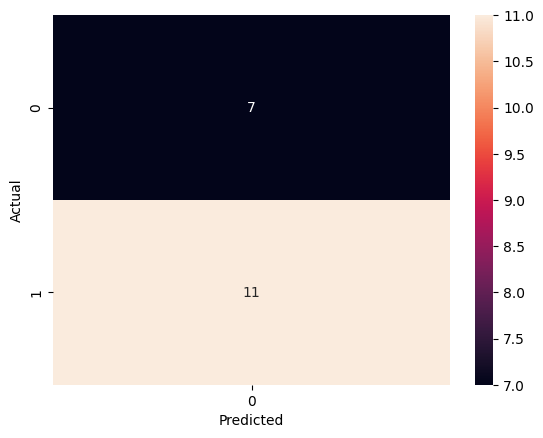

In [ ]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [ ]:
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.3888888888888889


In [ ]:
# by giving the next day return to the previous one we can know if it is positive or negative
microsoft_data['Profitability_nextday'] = (microsoft_data['returns'].shift(-1) > 0).astype(int)
microsoft_data['Target_today'] = (microsoft_data['returns'].shift(0) > 0).astype(int)

microsoft_data = microsoft_data.dropna().reset_index(drop=True)
microsoft_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,returns,Profitability_nextday,Target_today
0,489.185826,492.690076,487.897965,490.284027,16319600,0.0,0.0,-0.001951,1,0
1,492.999558,499.309193,492.630170,498.021301,13984800,0.0,0.0,0.015781,0,1
2,496.563699,497.931446,494.417234,496.903137,13981600,0.0,0.0,-0.002245,0,0
3,496.423909,497.382356,493.299041,495.804932,11846600,0.0,0.0,-0.002210,1,0
4,499.478901,505.948277,498.919823,502.683655,18659500,0.0,0.0,0.013874,0,1


In [ ]:
for i in range(1,6):
  microsoft_data[f'Lag{i}'] = nvidia_data['returns'].shift(i)

microsoft_data = microsoft_data.dropna().reset_index(drop=True)



In [ ]:
#we will train the data and test 30% of the sample size
X = microsoft_data[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5',]]
y = microsoft_data['Profitability_nextday']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,shuffle=False,)

In [ ]:
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)

<Axes: xlabel='Predicted', ylabel='Actual'>

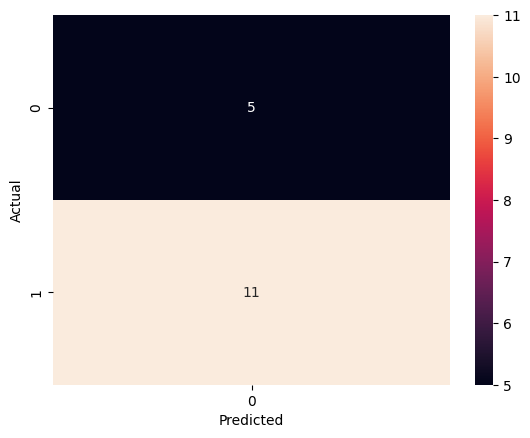

In [ ]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [ ]:
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.3125


In [ ]:
apple_data['Profitability_nextday']=(apple_data['returns'].shift(-1)>0).astype(int)
apple_data['Target_today']=(apple_data['returns'].shift(0)>0).astype(int)
apple_data = apple_data.dropna().reset_index(drop=True)
apple_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,returns,Profitability_nextday,Target_today
0,208.673176,213.098147,207.904045,212.199173,67941800,0.0,0.0,0.022231,1,1
1,211.909500,214.406666,211.569889,213.307922,34955800,0.0,0.0,0.005225,0,1
2,212.438891,215.984870,208.563300,209.711990,50229000,0.0,0.0,-0.016858,1,0
3,209.861836,211.190315,208.213698,209.771927,42848900,0.0,0.0,0.000286,1,1
4,209.292475,211.090437,206.985096,210.900650,48749400,0.0,0.0,0.005381,1,1


In [ ]:
for i in range(1,6):
  apple_data[f'Lag{i}']=apple_data['returns'].shift(i)

apple_data=apple_data.dropna().reset_index(drop=True)
apple_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,returns,Profitability_nextday,Target_today,Lag1,Lag2,Lag3,Lag4,Lag5
0,210.271350,213.237984,209.791898,212.169205,44443600,0.0,0.0,0.006015,0,1,0.005381,0.000286,-0.016858,0.005225,0.022231
1,210.331296,211.889525,209.622094,210.920624,39765800,0.0,0.0,-0.005885,0,0,0.006015,0.005381,0.000286,-0.016858,0.005225
2,209.692012,210.670912,207.304722,208.383499,38840100,0.0,0.0,-0.012029,1,0,-0.005885,0.006015,0.005381,0.000286,-0.016858
3,208.982831,211.649803,208.683168,208.872955,42296300,0.0,0.0,0.002349,1,1,-0.012029,-0.005885,0.006015,0.005381,0.000286
4,210.061609,212.159219,208.403487,209.921768,47490500,0.0,0.0,0.005021,0,1,0.002349,-0.012029,-0.005885,0.006015,0.005381


In [ ]:
X = apple_data[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5',]]
y = apple_data['Profitability_nextday']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,shuffle=False,)

In [ ]:
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)

<Axes: xlabel='Predicted', ylabel='Actual'>

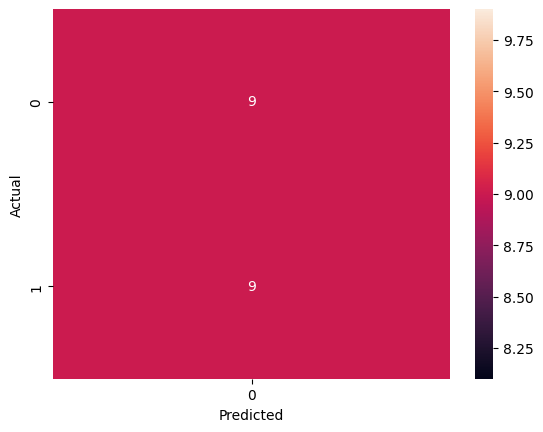

In [ ]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [ ]:
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.5


The logistic regression model attempted to predict whether the next day’s return for the stock would be positive or negative based on the past five days of returns. The resulting model accuracy was approximately 38.9%, which is below random chance.
-

The low accuracy suggests that past return has little predictive power for future price movements. In other words, past performance does not help forecast tomorrow’s outcome in any consistent way.
-
This finding aligns with the Weak Form of the Efficient Market Hypothesis. According to the weak form, all information contained in past prices and returns is already reflected in current market prices. Therefore, it is not possible to consistently earn excess profits by using historical data or patterns alone.
The logistical regressions inability to predict future returns better than random guessing supports this idea — the market appears to be efficient with respect to past price information.
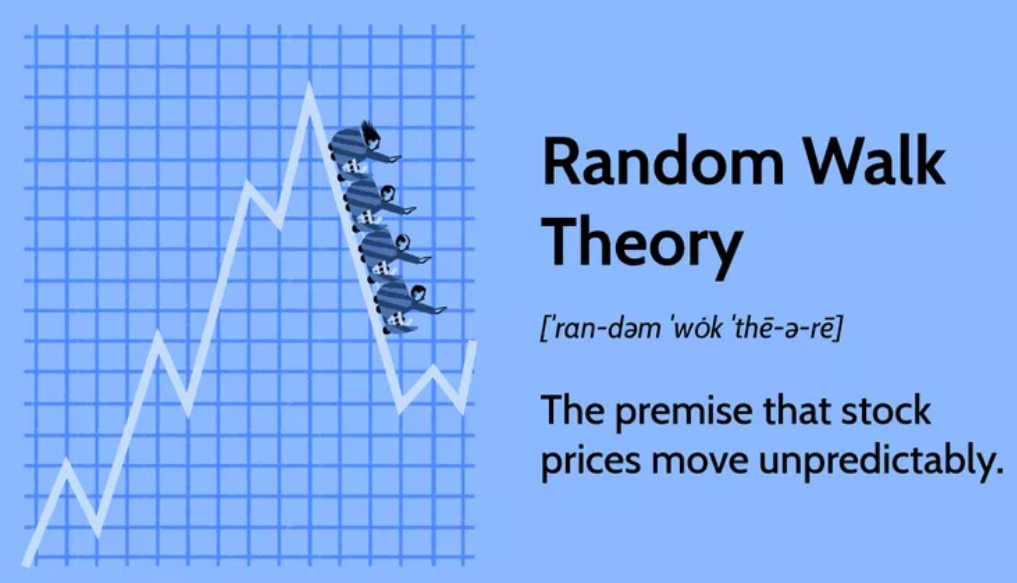
-